## Cycle of  This Deep Learning Project 
1. Understanding The Problem
2. Data Collection
3. Data Analysis
4. Pre-processing Text Data
5. Build The Model
6. Prepare Test Data
7. Evaluation 
8. Optimize The Accuracy
9. Build Predictive System
10. Save The Model 

## 1. Understanding The Problem
To accurately classify online Comments as positive , negative or Neutral, I developed a deep learning model (Bidirectional_LSTM) capable of effectively capturing the sentiment expressed within text data. The model was designed to learn intricate patterns in language, enabling it to distinguish between Comments conveying satisfaction and those expressing dissatisfaction. By leveraging (Bidirectional_LSTM) architectures, the model excels at processing and understanding the semantic and syntactic components of text,To Predict Positive or Negative Comments in Accurate Way

### importing The Dependencies 

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score , precision_score , classification_report , confusion_matrix , roc_auc_score
from nltk.stem import WordNetLemmatizer
import re 
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer

## 2. Data Collection
1. Loading The Data
2. Split The Data Into Train And Test

In [2]:
# 1- Loading the data 
data = pd.read_csv('tweet.csv')
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
## Split the data into train and test to prevent any chance for data leakage 
#1- shuffl the data 
data_shuffl = data.sample(data.shape[0] , random_state=0).reset_index(drop = True)

In [4]:
# 2. spliting 80 precent for train
train = data_shuffl[:21984].reset_index(drop = True)

test = data_shuffl[21984:].reset_index(drop = True)

In [5]:
## shape after spliting 
print(f"shape of train is {train.shape} shape of test is {test.shape}")

shape of train is (21984, 4) shape of test is (5497, 4)


## 3. Data Analysis
1. Imbalance Data
2. Missing values
3. Duplicated Values
4. Number of Characters For Each Labels
5. Number of Words For Each Labels
6. Number of Sentence For Each Labels 

### 1. Imbalance Data

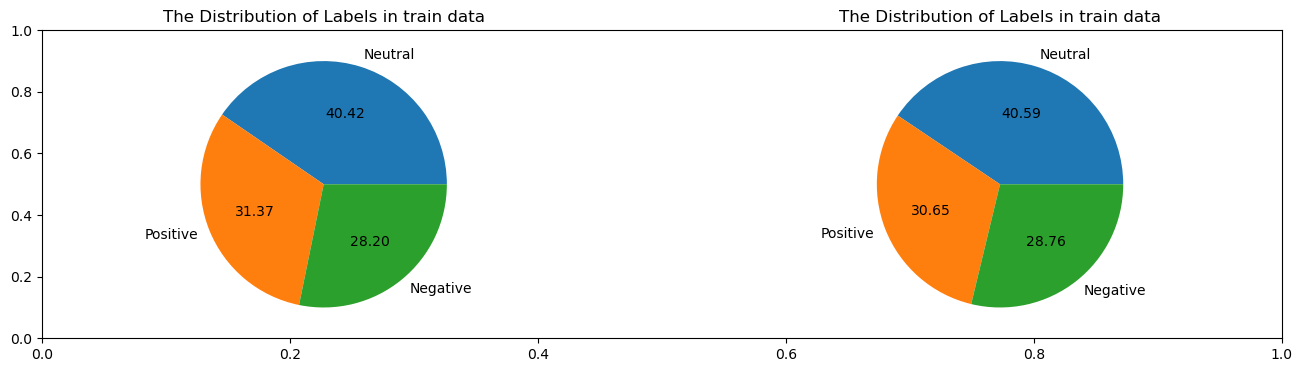

In [6]:
plt.subplots(figsize = (16,4))
plt.subplot(121)
plt.pie(train['sentiment'].value_counts(),labels=['Neutral' ,"Positive",'Negative' ] , autopct="%0.2f")
plt.title('The Distribution of Labels in train data')

plt.subplot(122)
plt.pie(test['sentiment'].value_counts(),labels=['Neutral' ,"Positive",'Negative' ] , autopct="%0.2f")
plt.title('The Distribution of Labels in train data')

plt.show()

### Conclusion
#### Dataset is not balanced

### 2. Missing values

In [7]:
# 1- train 
print(f" Nan values in train data is \n {train.isnull().sum()}")

# 2- test
print(f" Nan values in train data is\n  {test.isnull().sum()}")


 Nan values in train data is 
 textID           0
text             1
selected_text    1
sentiment        0
dtype: int64
 Nan values in train data is
  textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


#### There is 2 missing values in train data 

In [8]:
## drop nan value in train data 
train.dropna(inplace=True)

### 3. Duplicated Values


In [9]:
# 1- train 
print(f" Nan values in train data is \n {train.duplicated().sum()}")

# 2- test
print(f" Nan values in train data is\n  {test.duplicated().sum()}")


 Nan values in train data is 
 0
 Nan values in train data is
  0


#### There is no duplicated values 

### 4. Number of Characters For Each Labels

In [10]:
train['Num_char'] = train['text'].apply(len)

### 5. Number of Words For Each Labels


In [11]:
train['Num_Word'] = train['text'].apply(lambda x : len(nltk.word_tokenize(x)))

### 6. Number of Sentence For Each Labels 

In [12]:
train['Num_Sent'] = train['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [13]:
train.head()

,textID,text,selected_text,sentiment,Num_char,Num_Word,Num_Sent
0,80a1e6bc32,I just saw a shooting star... I made my wish,wish,positive,44,11,2
1,863097735d,gosh today sucks! i didnt get my tax returns! ...,gosh today sucks!,negative,125,28,3
2,264cd5277f,tired and didn`t really have an exciting Satur...,tired and didn`t really have an exciting Satur...,neutral,87,21,2
3,baee1e6ffc,i`ve been eating cheetos all morning..,i`ve been eating cheetos all morning..,neutral,38,9,1
4,67d06a8dee,haiiii sankQ i`m fineee ima js get a checkup ...,haiiii sankQ i`m fineee ima js get a checkup c...,neutral,99,24,1


In [14]:
## Create data for neutral positvie and negative
positive = train[train['sentiment'] == 'positive']

negative = train[train['sentiment'] == 'negative']

neutral = train[train['sentiment'] == 'neutral']

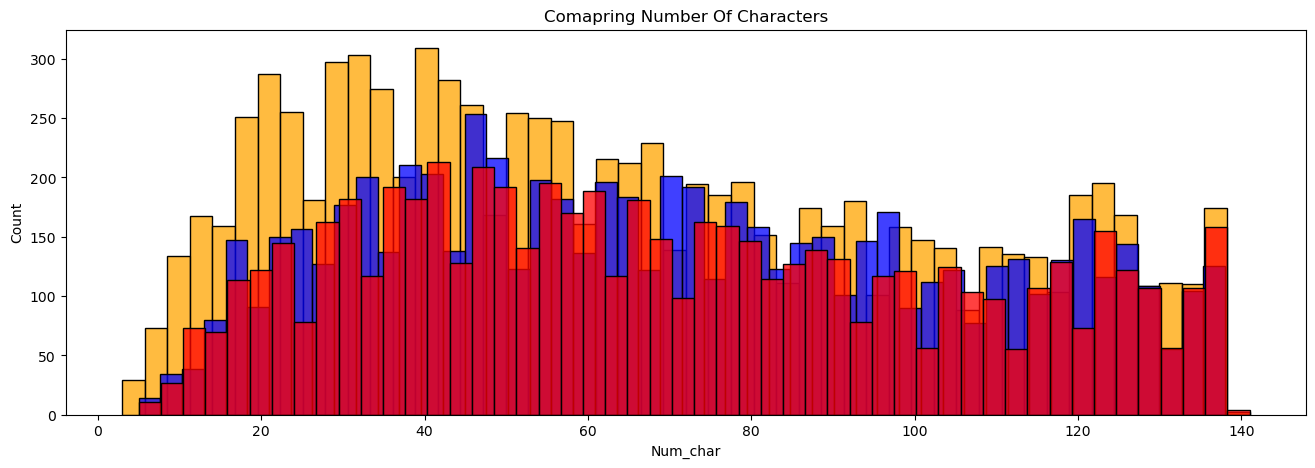

In [15]:
## Showing the differance between real and fake data regarding the num_char 
plt.figure(figsize=(16,5))
sns.histplot(neutral['Num_char'] , bins=50 ,color='orange')
sns.histplot(positive['Num_char'] , bins=50 , color='blue')
sns.histplot(negative['Num_char'] , bins=50 ,color='red')
plt.title('Comapring Number Of Characters')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


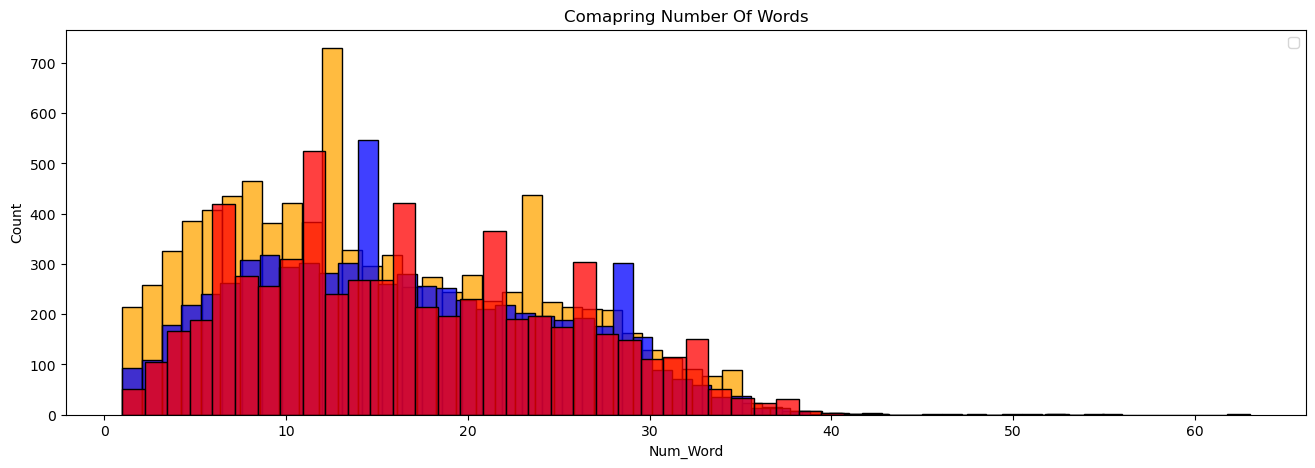

In [16]:
## Showing the differance between real and fake data regarding the number of words 
plt.figure(figsize=(16,5))
sns.histplot(neutral['Num_Word'] ,  bins=50 ,color='orange')
sns.histplot(positive['Num_Word'] , bins=50 , color='blue')
sns.histplot(negative['Num_Word'] , bins=50 ,color='red')
plt.title('Comapring Number Of Words')
plt.legend()
plt.show()


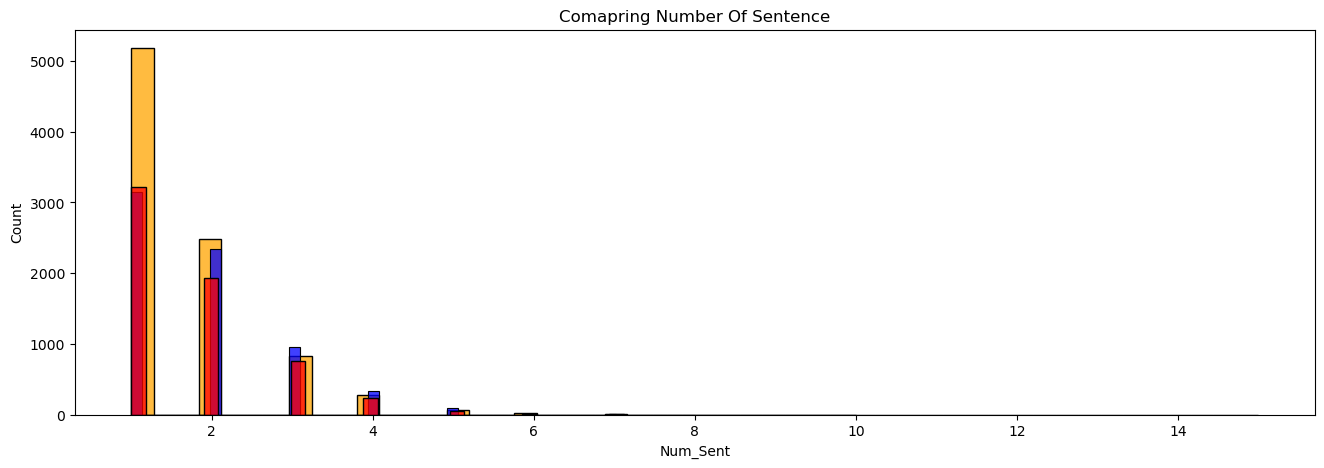

In [17]:
## Showing the differance between real and fake data regarding the number of sentence 
plt.figure(figsize=(16,5))
sns.histplot(neutral['Num_Sent'] , bins=50 ,color='orange')
sns.histplot(positive['Num_Sent'] , bins=50 , color='blue')
sns.histplot(negative['Num_Sent'] , bins=50 ,color='red')
plt.title('Comapring Number Of Sentence')
plt.show()


### Conclusion
#### Positive has the most number of Sentence

## 4. Pre-processing Text Data
1. Removing special characters
2. Lower Case
3. Tokeniaztion
4. Reduce Words To Its Root 

### Encoding 
1. using One_Hot_Encoder

In [18]:
## one_hot_encoder ==> train
train['sentiment'] = train['sentiment'].map({'positive' : 1 , 'negative' : 0 , 'neutral':2})


test['sentiment'] = test['sentiment'].map({'positive' : 1 , 'negative' : 0 , 'neutral':2})


In [19]:
train.head()

,textID,text,selected_text,sentiment,Num_char,Num_Word,Num_Sent
0,80a1e6bc32,I just saw a shooting star... I made my wish,wish,1,44,11,2
1,863097735d,gosh today sucks! i didnt get my tax returns! ...,gosh today sucks!,0,125,28,3
2,264cd5277f,tired and didn`t really have an exciting Satur...,tired and didn`t really have an exciting Satur...,2,87,21,2
3,baee1e6ffc,i`ve been eating cheetos all morning..,i`ve been eating cheetos all morning..,2,38,9,1
4,67d06a8dee,haiiii sankQ i`m fineee ima js get a checkup ...,haiiii sankQ i`m fineee ima js get a checkup c...,2,99,24,1


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential ## to create neural network
from tensorflow.keras.layers import Dense # to create layers and units
from tensorflow.keras.layers import  Embedding # to convert text to vector
from tensorflow.keras.layers import  LSTM , Bidirectional ## prevent vanshing gradient problem
from tensorflow.keras.preprocessing.text import one_hot ## assigns number for each unique word vocablary size
from tensorflow.keras.preprocessing.sequence import pad_sequences # to make all sentens same length
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
## Create object for tokenizer
tokenizer = Tokenizer(num_words=5000) # most commen and frequant words
## fitting on train data 
tokenizer.fit_on_texts(train['selected_text'])

In [22]:
## showing most numbers of words 
print(f"max length is {train['Num_Word'].max()}")


max length is 63


In [23]:
max_length = 65

## padding Make all sentence same length 
X_train = pad_sequences(tokenizer.texts_to_sequences(train['selected_text']) ,maxlen=max_length )

In [24]:
## Spliting the data into features and target
y_train = train['sentiment']

y_test = test['sentiment']

In [25]:
## shape of X_train and Y_train
X_train.shape , y_train.shape

((21983, 65), (21983,))

In [26]:
## Convert features and target to array
X_train_final = X_train

y_train_final = y_train

In [27]:
y_train_final

0        1
1        0
2        2
3        2
4        2
        ..
21979    1
21980    2
21981    1
21982    2
21983    2
Name: sentiment, Length: 21983, dtype: int64

In [28]:
X_train_final

array([[   0,    0,    0, ...,    0,    0,  100],
       [   0,    0,    0, ..., 1337,   46,  150],
       [   0,    0,    0, ...,   10,  121,  119],
       ...,
       [   0,    0,    0, ...,    0,   22,  286],
       [   0,    0,    0, ...,  466,  116, 1016],
       [   0,    0,    0, ...,    1,   21,  184]])

## 5.Build The Model

In [29]:
## Create the model
def lstm_model(X_train ,y_train , X_test ,y_test):
    features_vector = 100
    voc_size = 5000
    model = tf.keras.Sequential()
    
    model.add(Embedding(voc_size ,features_vector  , input_length=max_length))
    
    model.add(Bidirectional(LSTM(units=128 , dropout = 0.2 ,recurrent_dropout = 0.2)))
    
    ## output layer
    model.add(keras.layers.Dense(units = 3, activation=keras.activations.softmax))
    
    ## updating weight to minimize loss func
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
    
    ## early stopping to not overfitting
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    
    
    model.fit(X_train , y_train  , validation_split=0.20 , epochs=3 , callbacks = [early_stop] , batch_size = 64)

    ## evaluation 
    loss , accuracy = model.evaluate(X_test ,y_test ) 
    print(f'Accuracy is {accuracy}')

    return model 

## 6.Test Data Pre-processing

In [30]:
## tokniazation 
X_test = pad_sequences(tokenizer.texts_to_sequences(test['selected_text']) , maxlen=max_length)

## Convert features and target to array
X_test_final = X_test

y_test_final = y_test

In [31]:
X_test_final.shape , y_test_final.shape

((5497, 65), (5497,))

In [32]:
model_1 = lstm_model(X_train_final , y_train_final , X_test_final , y_test_final)


Epoch 1/3


275/275 [==============================] - 137s 459ms/step - loss: 0.5477 - accuracy: 0.7855 - val_loss: 0.4502 - val_accuracy: 0.8310
Epoch 2/3
275/275 [==============================] - 138s 502ms/step - loss: 0.3302 - accuracy: 0.8790 - val_loss: 0.4607 - val_accuracy: 0.8324
Epoch 3/3
172/172 [==============================] - 6s 34ms/step - loss: 0.5165 - accuracy: 0.8306
Accuracy is 0.8306348919868469


## 7. Evaluation 

In [33]:
## make prediction
y_pred = model_1.predict(X_test) 

y_pred = [np.argmax(i) for i in y_pred]


172/172 [==============================] - 6s 32ms/step


In [34]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test_final, predictions=y_pred)
## convert it into array
confusion_matrix = confusion_matrix.numpy()

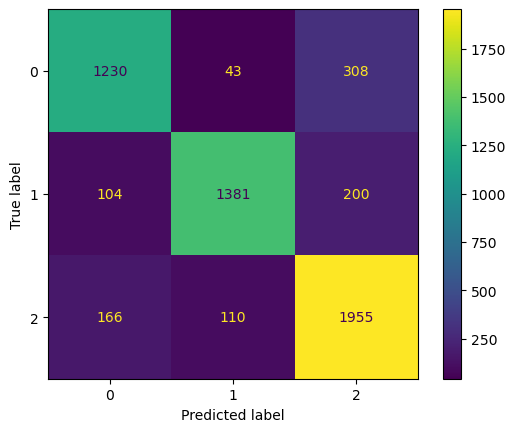

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay , precision_score , recall_score , f1_score
## ploting confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

# Plot the confusion matrix
disp.plot()
plt.show()

In [36]:
def macro_average(y_true, y_pred):

    # Calculate precision, recall, and F1-score for each label
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    # Calculate macro-average
    
    macro_precision = precision.mean()
    macro_recall = recall.mean()
    macro_f1 = f1.mean()
    
    print(f"macro_precision is {macro_precision}")
    print(f"macro_recall is {macro_recall}")
    print(f"macro_f1 is {macro_f1}")

In [37]:
orgin_data_evaluation = macro_average(y_test_final , y_pred)
orgin_data_evaluation

macro_precision is 0.8380027395457111
macro_recall is 0.8246206147758371
macro_f1 is 0.8298169262114244


### 8.  Optimize The Accuracy Based on Balanced Data
1. Oversampling Technique Smote
2. Undersampling Technique Tomlinks

### 1. Oversampling Technique Smote


In [38]:
from imblearn.over_sampling import SMOTE
## Create object for somte 
smote = SMOTE(sampling_strategy = 'minority')

In [39]:
y_train_final.value_counts()

sentiment
2    8886
1    6897
0    6200
Name: count, dtype: int64

In [40]:
## applying smote frist minority
X_train_sm , y_train_sm = smote.fit_resample(X_train_final , y_train_final)

X_test_sm , y_test_sm = smote.fit_resample(X_test_final , y_test_final)

In [41]:
## applying smote second minority
X_train_sm , y_train_sm = smote.fit_resample(X_train_sm , y_train_sm)

X_test_sm , y_test_sm = smote.fit_resample(X_test_sm , y_test_sm)

In [42]:
## y_train after resample 
y_train_sm.value_counts()

sentiment
1    8886
0    8886
2    8886
Name: count, dtype: int64

In [43]:
## y_test after resample
y_test_sm.value_counts()

sentiment
1    2231
2    2231
0    2231
Name: count, dtype: int64

In [44]:
## fitting on data after resample 
model_sm = lstm_model(X_train_sm , y_train_sm , X_test_sm , y_test_sm)

Epoch 1/3
334/334 [==============================] - 168s 479ms/step - loss: 0.5232 - accuracy: 0.7943 - val_loss: 1.0340 - val_accuracy: 0.6208
Epoch 2/3
334/334 [==============================] - 167s 501ms/step - loss: 0.3361 - accuracy: 0.8748 - val_loss: 1.1287 - val_accuracy: 0.6195
Epoch 3/3
210/210 [==============================] - 8s 40ms/step - loss: 0.7236 - accuracy: 0.7896
Accuracy is 0.7896309494972229


In [45]:
## make prediction
y_pred_sm = model_sm.predict(X_test_sm) 

y_pred_sm = [np.argmax(i) for i in y_pred_sm]

210/210 [==============================] - 10s 40ms/step


In [46]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test_sm, predictions=y_pred_sm)
## convert it into array
confusion_matrix = confusion_matrix.numpy()

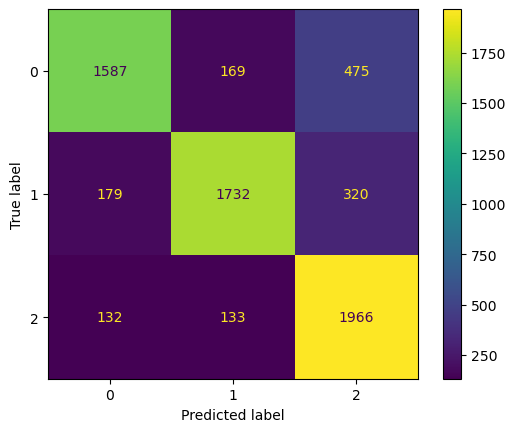

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay , precision_score , recall_score , f1_score
## ploting confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

# Plot the confusion matrix
disp.plot()
plt.show()

In [48]:
sm_evaluation = macro_average(y_test_sm , y_pred_sm)
sm_evaluation

macro_precision is 0.7999094155757357
macro_recall is 0.7896309577170179
macro_f1 is 0.7895205498509726


### 2. Undersampling Technique Tomlinks

In [49]:
from imblearn.under_sampling import TomekLinks
## Create object 
tomlinks = TomekLinks(sampling_strategy = 'majority')

In [50]:
## applying smote frist minority
X_train_tom , y_train_tom = tomlinks.fit_resample(X_train_final , y_train_final)

X_test_tom , y_test_tom = tomlinks.fit_resample(X_test_final , y_test_final)

In [51]:
## y_train after resample 
y_train_tom.value_counts()

sentiment
2    7756
1    6897
0    6200
Name: count, dtype: int64

In [52]:
## y_test after resample
y_test_tom.value_counts()

sentiment
2    1954
1    1685
0    1581
Name: count, dtype: int64

In [53]:
## fitting on data after resample 
model_tom = lstm_model(X_train_tom , y_train_tom , X_test_tom , y_test_tom)

Epoch 1/3
261/261 [==============================] - 149s 534ms/step - loss: 0.5347 - accuracy: 0.7848 - val_loss: 0.4240 - val_accuracy: 0.8425
Epoch 2/3
261/261 [==============================] - 168s 643ms/step - loss: 0.3263 - accuracy: 0.8785 - val_loss: 0.4641 - val_accuracy: 0.8228
Epoch 3/3
164/164 [==============================] - 7s 45ms/step - loss: 0.4988 - accuracy: 0.8398
Accuracy is 0.8398467302322388


In [54]:
## make prediction
y_pred_tom = model_tom.predict(X_test_tom) 

y_pred_tom = [np.argmax(i) for i in y_pred_tom]

164/164 [==============================] - 8s 45ms/step


In [55]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test_tom, predictions=y_pred_tom)
## convert it into array
confusion_matrix = confusion_matrix.numpy()

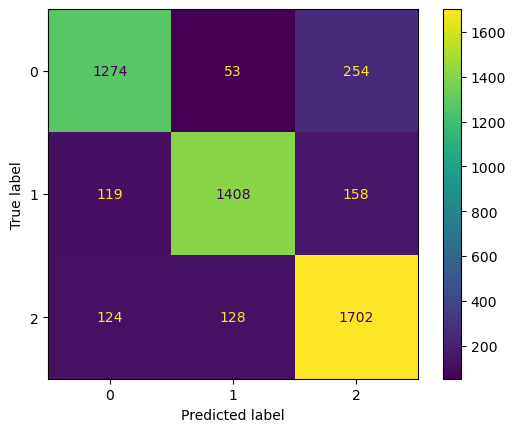

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay , precision_score , recall_score , f1_score
## ploting confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

# Plot the confusion matrix
disp.plot()
plt.show()

In [58]:
tom_evaluation = macro_average(y_test_tom , y_pred_tom)
tom_evaluation

macro_precision is 0.8436720351180519
macro_recall is 0.8374870624358621
macro_f1 is 0.8397836307766785


### Insight 
#### Based on macro_precision , macro_recall and macro_f1 Used different technique the best accuracy is model we used Tomlinks as technique to address imbalanced dataset problem 

## 9. Predictive System

In [89]:
def predict_sentiment(text):
  # Tokenization
  feature = tokenizer.texts_to_sequences([text])

  # Padding
  padding_features = pad_sequences(feature, maxlen=max_length)

  # Make prediction
  prediction = model_tom.predict(padding_features)
  prediction = [np.argmax(i) for i in prediction]

  # Output
  if prediction[0] == 1:
      return "Positive"
  elif prediction[0] == 0:
      return "Negative"
  else:
      return "Neutral"


In [92]:
## this positive comment for youtube 
example = "First of all this project is so interesting!!! You are amazing, teaching means telling me why exactly we are we doing what we are doing. Thank you for being a real tutor and not being boring too! i was always questioning my brains ability but your way of teaching made me realize that its not my brain its the way we are being taught. I bet your channel is going to bring me to the next level"
sentiment = predict_sentiment(example)
print(f'This Comment is {sentiment}')

1/1 [==============================] - 0s 65ms/step
This Comment is Positive


In [108]:
## this Negative comment 
example_2 = "i lost all my friends, i`m alone and sleepy."
sentiment = predict_sentiment(example_2)
print(f'This Comment is {sentiment}')

1/1 [==============================] - 0s 67ms/step
This Comment is Negative


In [107]:
## this Neutral comment 
example_2 = "If you know such agent, do let me know"
sentiment = predict_sentiment(example_2)
print(f'This Comment is {sentiment}')

1/1 [==============================] - 0s 80ms/step
This Comment is Neutral


## 10 Save The Model 

In [60]:
model_tom.save('model_tom.h5')